In [9]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
from tensorflow import keras

In [2]:
NORMAL_INPUT_DATA_DIR = "./split_data/normal/"
FAULT_INPUT_DATA_DIR = "./split_data/fault/"
TRAIN_RESULTS_DIR = './train_results/'

In [3]:
title = pickle.load(open(TRAIN_RESULTS_DIR + 'title.p', 'rb'))
params = pickle.load(open(TRAIN_RESULTS_DIR + 'params.p', 'rb'))
avg = np.array(pickle.load(open(TRAIN_RESULTS_DIR + 'avg.p', 'rb')))
desc = pickle.load(open(TRAIN_RESULTS_DIR + 'desc.p', 'rb'))
history = pickle.load(open(TRAIN_RESULTS_DIR + 'history.p', 'rb'))
conf_mat = pickle.load(open(TRAIN_RESULTS_DIR + 'conf_mat.p', 'rb'))

In [4]:
def get_data(input_dir, series_size=31):
    data = []
    for (dirpath, dirnames, filenames) in os.walk(input_dir):
        for filename in filenames:
            try:
                path = input_dir+"/" + filename
                frame = pd.read_csv(path, header=None)
                if frame.to_numpy().shape == (31,10):
                    data.append(frame.to_numpy().tolist())
            except Exception as exp:
                print(filename)
                print(exp)

    split_data = []
    for i in range(0,len(data)):
        for j in range(0,len(data[i])-series_size+1):
            split_data.append(data[i][j:j+series_size])
    return np.array(split_data)[:,:,1:10]

In [5]:
def load_data(series_size):
    normal_data = get_data(NORMAL_INPUT_DATA_DIR,series_size)
    fault_data = get_data(FAULT_INPUT_DATA_DIR,series_size)
    data = np.concatenate((normal_data, fault_data))
    labels = np.concatenate((np.zeros(len(normal_data)), np.ones(len(fault_data))))
    return data, labels

# Load one of trained models

In [6]:
model_s10 = keras.models.load_model('./best_models/vl0.000012va1.000000m0s10f3.hdf5')

In [7]:
data, labels = load_data(10)
y_pred = model_s10.predict(data)

desktop.ini
Error tokenizing data. C error: Expected 1 fields in line 2, saw 2

74/74 [==============================] - 1s 4ms/step


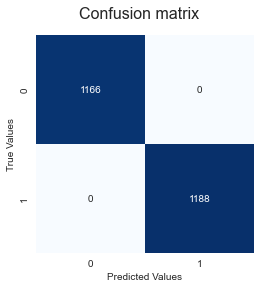

In [10]:
conf_mat = sklearn.metrics.confusion_matrix(labels, y_pred.round())
sns.heatmap(conf_mat, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.suptitle("Confusion matrix", fontsize=16)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()